# Regresion Lineal

### Regresión lineal

Se han de tener algunas suposiciones previas:

+ Exogeneidad débil (predictores libres de error)
+ Linealidad
+ Homocedasticidad (Var=cte) y Esperanza nula (**E**=0), la esperanza es la media
+ Independencia de los errores
+ Falta de colinealidad (independencia lineal)

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n+\epsilon$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente:

$$\vec{\beta} = (X^{T}X)^{-1}X^{T}y$$

+ Minimos cuadrados

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y-\hat{y})^{2}$$

Ejemplo)

$y = \beta_0 + \beta_1x_1 + \epsilon$

Entonces, derivando MSE e igualando a 0:

$\beta_0 = \frac{\sum y - \beta_1\sum x}{n} = \bar{y} - \beta_1\bar{x}$

$\beta_1=\frac{\sum (x-\hat{x})(y-\hat{y})}{\sum (x-\hat{x})}$



In [3]:
import pandas as pd 

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

import warnings
warnings.filterwarnings('ignore')

In [4]:
boston=fetch_california_housing()

In [5]:
df=pd.DataFrame(boston.data, columns=boston.feature_names)

df['price']=boston.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
#X=df.drop('price', axis=1)

#y=df.price


X=boston.data

y=boston.target

In [7]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [9]:
linreg=LinReg()

linreg.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred=linreg.predict(X_test)

y_pred[:10]

array([2.02445946, 3.75973229, 3.22262529, 3.57300511, 2.18634072,
       3.68349731, 1.25466513, 1.63573933, 2.83274892, 2.163566  ])

In [11]:
train_score=linreg.score(X_train, y_train)   # R2
test_score=linreg.score(X_test, y_test)

print (train_score, test_score)

0.6080088915168569 0.5972775806583054


In [15]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

In [12]:
linreg.coef_

array([ 4.42636039e-01,  9.09352221e-03, -1.17048944e-01,  6.41985929e-01,
       -4.43154217e-06, -4.09782456e-03, -4.15918963e-01, -4.30828249e-01])

In [13]:
linreg.intercept_

-36.650778354818954

##### Regularización

**Función de Coste o de Pérdida (J)** = Función a minimizar

En el caso de la regresión lineal: 
$$J=MSE$$


La regularización es una medida/penalización de la complejidad del modelo. Se añade un término a J que depende del tipo de regularización:

$$J = MSE + \alpha · T$$


+ Lasso (L1, norma 1):

$$T=\frac{1}{n}\sum_{i}  |\beta_i|$$

Muy útil si se sospecha que hay características irrelevantes. Se favorece $\beta \approx 0$

+ Ridge (L2):

$$T=\frac{1}{2n}\sum_{i}  \beta_{i}^{2}$$

Muy útil si se sospecha que existe correlación entre las características, minimiza esa correlación. Funciona mejor si todas son relevantes.

+ ElasticNet (L1+L2):

$$T=r·L1 + (1-r)·L2$$

Se usa cuando hay muchas características.

In [16]:
# Lasso L1

lasso=Lasso()
lasso.fit(X_train, y_train)


train_score=linreg.score(X_train, y_train)   # R2 coeficiente de determinacion
test_score=linreg.score(X_test, y_test)

print (train_score, test_score)

0.6080088915168569 0.5972775806583054


In [18]:
# Ridge L2

ridge=Ridge()
ridge.fit(X_train, y_train)


train_score=linreg.score(X_train, y_train)   # R2
test_score=linreg.score(X_test, y_test)

print (train_score, test_score)

0.6080088915168569 0.5972775806583054


In [19]:
# ElasticNet L1+L2

elastic=ElasticNet()
elastic.fit(X_train, y_train)


train_score=linreg.score(X_train, y_train)   # R2
test_score=linreg.score(X_test, y_test)

print (train_score, test_score)

0.6080088915168569 0.5972775806583054


In [20]:
elastic.coef_

array([ 2.52557325e-01,  1.09733584e-02,  0.00000000e+00, -0.00000000e+00,
        1.06504269e-05, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [21]:
elastic.intercept_

0.7579882262401958

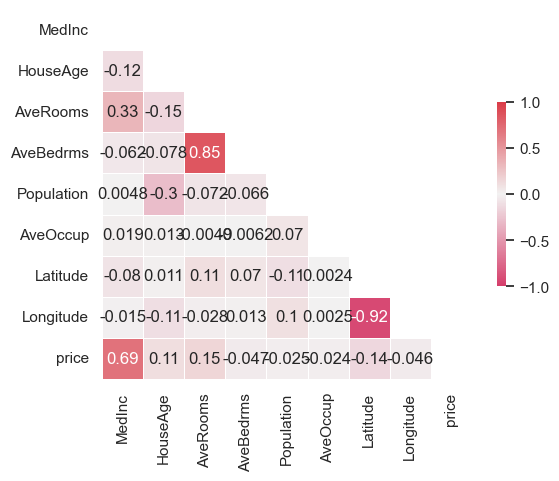

In [24]:
import seaborn as sns
import numpy as np

corr = df.corr()

sns.set(style='white')       # estilo blanco

mascara = np.triu(np.ones_like(corr, dtype=bool))   # mascara

cmap = sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores



sns.heatmap(corr,             # datos
            mask=mascara,     # mascara
            cmap=cmap,        # mapa de color
            
            vmax=1,           # maximo vertical
            vmin=-1,          # minimo vertical
            center=0,         # centro
            
            square=True,      # cuadrado el dato pintado
            linewidth=0.5,    # ancho de la linea
            
            cbar_kws={'shrink': 0.5},  # barra de color
            annot=True                 # anotacion, el numero escrito
            
           );